In [1]:
import gym
import gym_snake
import numpy as np
import cv2 as cv
import torch
import random
import matplotlib.pyplot as plt

from helpers.feature_extraction import feature_vector
from helpers.genetic_algorithms import create_mating_pool, create_population, calculate_fitness

# Construct Environment
env = gym.make('snake-v0')
env.grid_size = 15, 15
observation = env.reset()  # Constructs an instance of the game

# Controller
game_controller = env.controller

# Grid
grid_object = game_controller.grid
grid_pixels = grid_object.grid

# Snake(s)
snakes_array = game_controller.snakes
snake_object = snakes_array[0]

# observation = env.reset()
to_pixels = lambda x: cv.resize(x, env.grid_size)
        

In [2]:
# Check if cuda is available
print(torch.cuda.is_available())
cuda = torch.device('cuda:0')

True


In [5]:
# Check feature vector for initial snake position
print(feature_vector(snake_object, grid_object.grid, env.grid_size, grid_object.FOOD_COLOR))  

[ 0.          1.          0.          0.         11.         10.
  3.          8.         12.          7.          0.08727021]


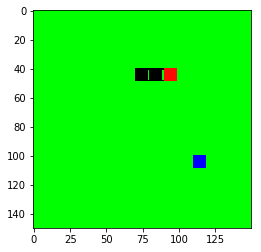

In [6]:
# Make a step and plot the returned observation
plt.imshow(env.step(snake_object.RIGHT)[0])

In [8]:
# Initial population + configurations
n_individuals = 100
n_generations = 200
population = create_population(n_individuals)
percentage_to_save = .3


for i in range(n_generations):
    new_generation = []
    fitness = []

    for j in range(len(population)):
        fit_score = calculate_fitness(population[j], env, display=False, save=False)
        fitness.append(fit_score)

    mating_pool = create_mating_pool(fitness, population, int(percentage_to_save * n_individuals))

    new_generation = []
    while len(new_generation) < n_individuals:
        sample = random.sample(mating_pool, 2)  # Randomly select 2 individuals from mating_pool
        parent1, parent2 = sample[0], sample[1]
        child1, child2 = parent1.crossover(parent2)
        child1.mutate()
        child2.mutate()
        new_generation += [child1, child2]
    population = new_generation
    
    print("gen: " + str(i + 1) + ". Best result:", max(fitness))

    
# Save the best individual to file "model"
max(population, key=lambda x: calculate_fitness(x, env)).save_model()

gen: 1. Best result: -14.0
gen: 2. Best result: -14.0
gen: 3. Best result: -14.5
gen: 4. Best result: -14.5
gen: 5. Best result: -97.75
gen: 6. Best result: -16.5
gen: 7. Best result: -14.5
gen: 8. Best result: -97.75
gen: 9. Best result: -14.0
gen: 10. Best result: -14.0
gen: 11. Best result: -97.75
gen: 12. Best result: -97.75
gen: 13. Best result: -97.75
gen: 14. Best result: -97.75
gen: 15. Best result: -14.25
gen: 16. Best result: -14.25
gen: 17. Best result: -10.25
gen: 18. Best result: -97.75
gen: 19. Best result: -97.75
gen: 20. Best result: -14.0
gen: 21. Best result: -97.75
gen: 22. Best result: -97.75
gen: 23. Best result: -98.5
gen: 24. Best result: -92.59314575050762
gen: 25. Best result: -97.75
gen: 26. Best result: -97.75
gen: 27. Best result: -97.75
gen: 28. Best result: -97.75
gen: 29. Best result: -97.75
gen: 30. Best result: -102.0
gen: 31. Best result: -97.75
gen: 32. Best result: -97.75
gen: 33. Best result: -97.75
gen: 34. Best result: -97.75
gen: 35. Best result:

KeyboardInterrupt: 